In [ ]:
!pip install statsmodels

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
sns.set_theme(style="darkgrid")
import scipy.stats
from random import seed
from random import random
from matplotlib import pyplot
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt

In [2]:
# Importing the data
raw_csv_data = pd.read_excel("CallCenterData.xlsx")

In [3]:
# Check point of data
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,month,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
0,2010-01-31,631,8,6,2,19,1,4
1,2010-02-28,633,9,7,3,27,1,3
2,2010-03-31,766,4,4,2,24,1,1
3,2010-04-30,768,12,6,3,32,1,1
4,2010-05-31,1003,2,7,2,42,1,4


In [5]:
df_comp.describe()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,9856.704545,2411.856061,514.204545,112.454545,651.681818,2.250000,2.537879
std,6221.071304,1714.759241,392.882978,69.680773,395.949633,1.867255,1.161766
min,631.000000,2.000000,4.000000,2.000000,19.000000,0.000000,1.000000
25%,3744.250000,608.750000,119.000000,39.750000,363.500000,1.000000,1.000000
50%,9651.500000,2613.500000,486.000000,130.500000,581.000000,2.000000,3.000000
75%,15590.750000,4000.500000,901.500000,171.250000,997.750000,3.000000,4.000000
max,23602.000000,5138.000000,1310.000000,229.000000,1535.000000,11.000000,4.000000


In [6]:
df_comp.isna().sum()

month            0
Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
dtype: int64

---

## Setting date as Index

In [ ]:
# Describe the "month" column, assuming it contains datetime values
df_comp.month.describe()


In [8]:
# Set the "month" column as the index of df_comp
df_comp.set_index("month", inplace=True)


In [9]:
df_comp.head()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
month,,,,,,,
2010-01-31,631,8,6,2,19,1,4
2010-02-28,633,9,7,3,27,1,3
2010-03-31,766,4,4,2,24,1,1
2010-04-30,768,12,6,3,32,1,1
2010-05-31,1003,2,7,2,42,1,4


In [10]:
# Set the frequency of df_comp to monthly
df_comp.asfreq('M')


,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
month,,,,,,,
2010-01-31,631,8,6,2,19,1,4
2010-02-28,633,9,7,3,27,1,3
2010-03-31,766,4,4,2,24,1,1
2010-04-30,768,12,6,3,32,1,1
2010-05-31,1003,2,7,2,42,1,4
...,...,...,...,...,...,...,...
2020-08-31,20257,4486,1111,212,371,4,3
2020-09-30,19207,4474,1020,135,362,3,1
2020-10-31,23414,5138,1310,188,523,3,4


In [11]:
# Set the frequency of df_comp to monthly and update the DataFrame
df_comp = df_comp.asfreq('M')


In [12]:
# Checking for null values
df_comp.isna().sum()

Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
dtype: int64

---

## Time Series Visualization

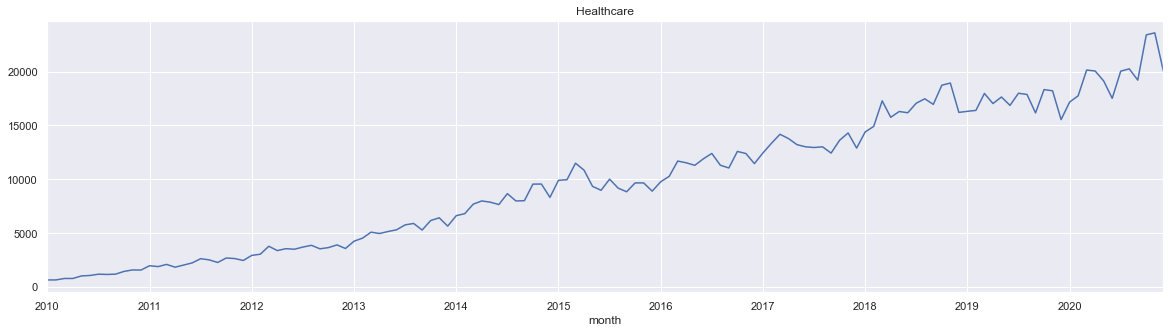

In [13]:
# Create a line plot of the "Healthcare" column
df_comp.Healthcare.plot(figsize=(20,5), title="Healthcare")
plt.show()

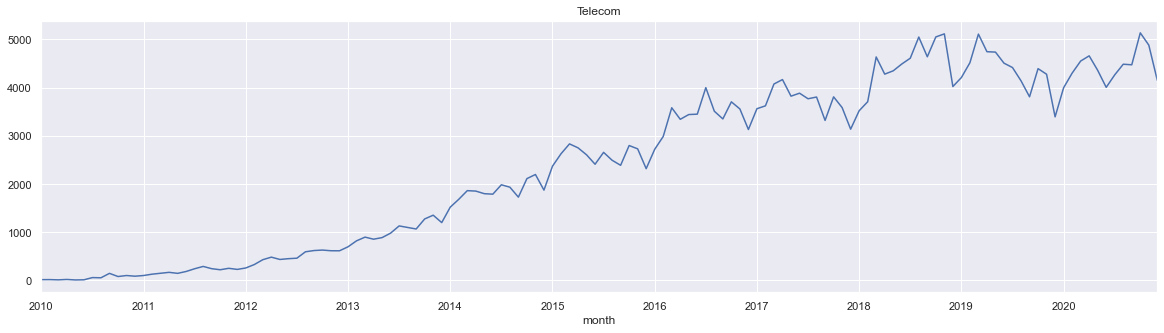

In [14]:
# Create a line plot of the "Telecom" column
df_comp.Telecom.plot(figsize=(20,5), title="Telecom")
plt.show()

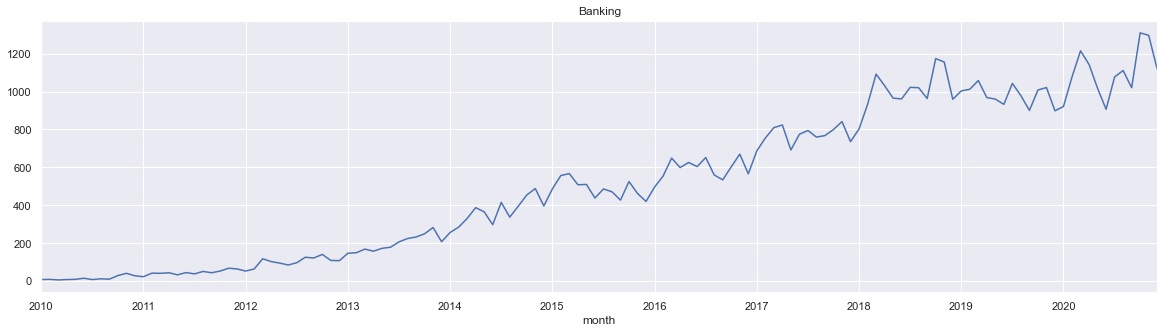

In [15]:
# Create a line plot of the "Banking" column
df_comp.Banking.plot(figsize=(20,5), title="Banking")
plt.show()

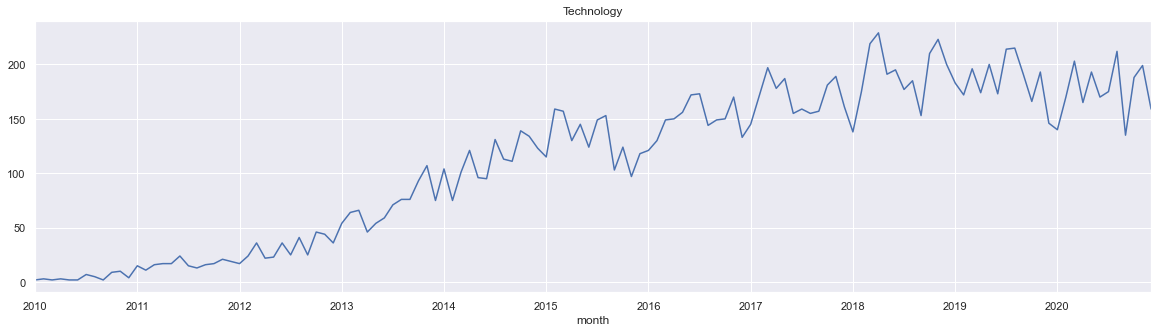

In [16]:
# Create a line plot of the "Technology" column
df_comp.Technology.plot(figsize=(20,5), title="Technology")
plt.show()

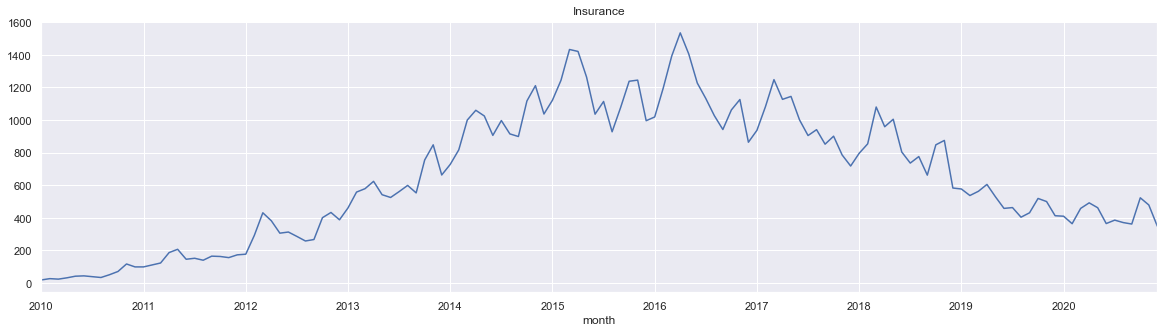

In [17]:
# Create a line plot of the "Insurancce" column
df_comp.Insurance.plot(figsize=(20,5), title="Insurance")
plt.show()

---

## Train Test Split

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Set test size
test_size = 22

# Split data into training and test sets
df_train = df_comp[:-test_size]  # Training
df_test = df_comp[-test_size:]   # Test


---

## LLR Test

In [21]:
# Likelihood Ratio Test (LLR) between two models
def LLR_test(mod_1, mod_2, DF=1):
    # Fit the first model and compute its log-likelihood
    L1 = mod_1.fit(start_ar_lags=11).llf
    # Fit the second model and compute its log-likelihood
    L2 = mod_2.fit(start_ar_lags=11).llf
    # Calculate the LR statistic
    LR = 2 * (L2 - L1)
    # Calculate the p-value using the chi-squared distribution
    p = chi2.sf(LR, DF).round(3)
    return p


---

## Calculating Returns and Volatility

In [22]:
# Calculate daily returns as a percentage change
df_train['returns'] = df_train.Banking.pct_change(1) * 100


In [23]:
# Calculate squared returns
df_train['sq_returns'] = df_train.returns.mul(df_train.returns)


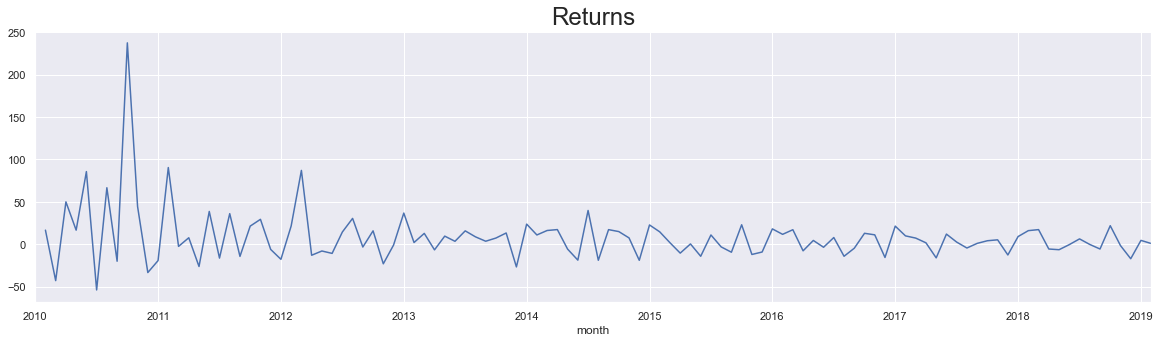

In [24]:
# Plot daily returns
df_train.returns.plot(figsize=(20, 5))
plt.title("Returns", size=24)
plt.show()


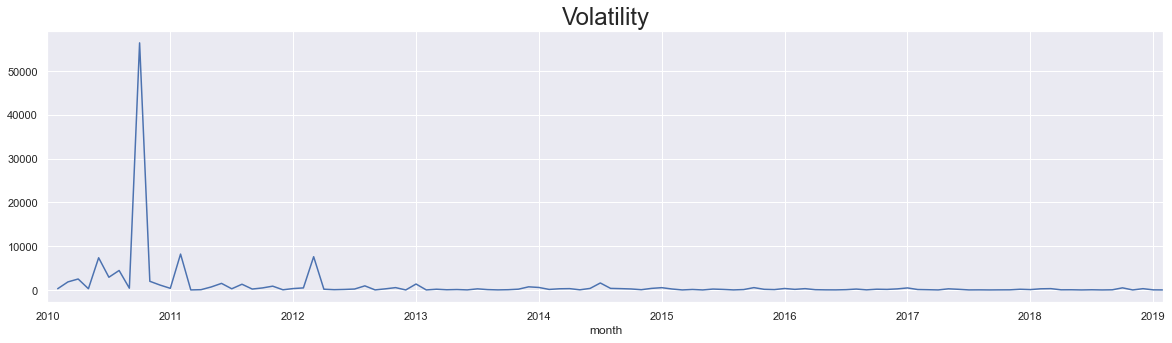

In [25]:
# Plot squared returns for volatility
df_train.sq_returns.plot(figsize=(20, 5))
plt.title("Volatility", size=24)
plt.show()


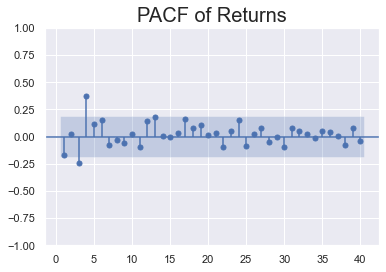

In [26]:
# Plot Partial Autocorrelation Function (PACF) of Returns
sgt.plot_pacf(df_train.returns[1:], lags=40, alpha=0.05, zero=False, method='ols')
plt.title("PACF of Returns", size=20)
plt.show()


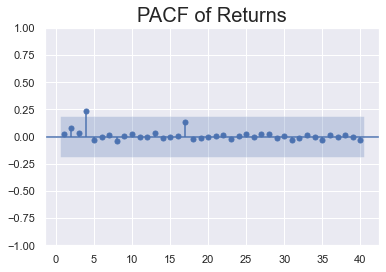

In [27]:
# Plot Partial Autocorrelation Function (PACF) of Squared Returns
sgt.plot_pacf(df_train.sq_returns[1:], lags=40, alpha=0.05, zero=False, method='ols')
plt.title("PACF of Squared Returns", size=20)
plt.show()


---

## The arch_model() Method

In [28]:
from arch import arch_model

In [29]:
# Define an ARCH(1) model
model_arch_1 = arch_model(df_train.returns[1:])
# Fit the model with updates every 5 iterations
results_arch_1 = model_arch_1.fit(update_freq=5)
# Display the model summary
results_arch_1.summary()


Iteration:      5,   Func. Count:     31,   Neg. LLF: 499.2281760285186
Iteration:     10,   Func. Count:     59,   Neg. LLF: 486.6060806674633
Iteration:     15,   Func. Count:     87,   Neg. LLF: 483.16015254111335
Iteration:     20,   Func. Count:    114,   Neg. LLF: 479.90799972801926
Optimization terminated successfully    (Exit mode 0)
            Current function value: 479.9079831433538
            Iterations: 22
            Function evaluations: 124
            Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -479.908
Distribution:                  Normal   AIC:                           967.816
Method:            Maximum Likelihood   BIC:                           978.581
                                        No. Observations:                  109
Date:                Fri, Nov 19 2021   Df Residuals:                      108
Time:                        12:32:40   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             3.4664      1.419      2.443  1.456e-02 [  0.685,  6.247]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          4.3495      2.852      1.525      0.127      [ -1.241,  9.940]
alpha[1]       0.0000  3.080e-02      0.000      1.000 [-6.037e-02,6.037e-02]
beta[1]        0.9475  4.168e-02     22.734 2.060e-114      [  0.866,  1.029]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
# Save the results of ARCH(1) model to a pickle file
import pickle
pickle.dump(results_arch_1, open("model.pkl", "wb"))

# Print the prediction of residual variance from GARCH model
print("Prediction:", pred_garch.residual_variance.tail(1).values[0])


Predictions : 91.98934794


In [30]:
# Define an ARCH(1) model with a constant mean, ARCH volatility, and normal distribution
model_arch_1 = arch_model(df_train.returns[1:], mean="Constant", vol="ARCH", p=1, dist="Normal")
# Fit the model with updates every 5 iterations
results_arch_1 = model_arch_1.fit(update_freq=5)
# Display the model summary
results_arch_1.summary()


Iteration:      5,   Func. Count:     21,   Neg. LLF: 520.5488430424844
Iteration:     10,   Func. Count:     41,   Neg. LLF: 520.5331667128291
Optimization terminated successfully    (Exit mode 0)
            Current function value: 520.5313115535132
            Iterations: 13
            Function evaluations: 52
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -520.531
Distribution:                  Normal   AIC:                           1047.06
Method:            Maximum Likelihood   BIC:                           1055.14
                                        No. Observations:                  109
Date:                Fri, Nov 19 2021   Df Residuals:                      108
Time:                        12:32:47   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.7058      5.000      1.541      0.123 [ -2.094, 17.506]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        389.9581    382.111      1.021      0.307 [-3.590e+02,1.139e+03]
alpha[1]       1.0000      1.173      0.853      0.394      [ -1.299,  3.299]
=============================================================================

Covariance estimator: robust
"""

In [31]:
# Define an ARCH(1) model with a constant mean, specified lags, ARCH volatility, and normal distribution
model_arch_1 = arch_model(df_train.returns[1:], mean="Constant", lags=[4, 3, 6], vol="ARCH", p=1, dist="Normal")
# Fit the model with updates every 5 iterations
results_arch_1 = model_arch_1.fit(update_freq=5)
# Display the model summary
results_arch_1.summary()


Iteration:      5,   Func. Count:     21,   Neg. LLF: 520.5488430424844
Iteration:     10,   Func. Count:     41,   Neg. LLF: 520.5331667128291
Optimization terminated successfully    (Exit mode 0)
            Current function value: 520.5313115535132
            Iterations: 13
            Function evaluations: 52
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -520.531
Distribution:                  Normal   AIC:                           1047.06
Method:            Maximum Likelihood   BIC:                           1055.14
                                        No. Observations:                  109
Date:                Fri, Nov 19 2021   Df Residuals:                      108
Time:                        12:32:54   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             7.7058      5.000      1.541      0.123 [ -2.094, 17.506]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        389.9581    382.111      1.021      0.307 [-3.590e+02,1.139e+03]
alpha[1]       1.0000      1.173      0.853      0.394      [ -1.299,  3.299]
=============================================================================

Covariance estimator: robust
"""

---

## Higher-Lag ARCH Models


In [32]:
# Define an ARCH(2) model with a constant mean, ARCH volatility, and normal distribution
model_arch_2 = arch_model(df_train.returns[1:], mean="Constant", vol="ARCH", p=2, dist="Normal")
# Fit the model with updates every 5 iterations
results_arch_2 = model_arch_2.fit(update_freq=5)
# Display the model summary
results_arch_2.summary()


Iteration:      5,   Func. Count:     29,   Neg. LLF: 489.37945277297774
Iteration:     10,   Func. Count:     54,   Neg. LLF: 489.34825721930144
Iteration:     15,   Func. Count:     79,   Neg. LLF: 489.2762335297818
Iteration:     20,   Func. Count:    103,   Neg. LLF: 489.2500248804886
Optimization terminated successfully    (Exit mode 0)
            Current function value: 489.2500249356933
            Iterations: 20
            Function evaluations: 103
            Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -489.250
Distribution:                  Normal   AIC:                           986.500
Method:            Maximum Likelihood   BIC:                           997.265
                                        No. Observations:                  109
Date:                Fri, Nov 19 2021   Df Residuals:                      108
Time:                        12:33:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             4.2513      1.354      3.141  1.685e-03 [  1.598,  6.904]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega        135.4495     39.898      3.395  6.865e-04  [ 57.251,2.136e+02]
alpha[1]       0.1449  8.528e-02      1.699  8.929e-02 [-2.224e-02,  0.312]
alpha[2]       0.8551      0.338      2.532  1.134e-02    [  0.193,  1.517]
===========================================================================

Covariance estimator: robust
"""

In [33]:
# Define an ARCH(3) model with an autoregressive mean, ARCH volatility, and normal distribution
model_arch_3 = arch_model(df_train.returns[1:], mean="AR", vol="ARCH", p=3, dist="Normal")
# Fit the model with updates every 5 iterations
results_arch_3 = model_arch_3.fit(update_freq=5)
# Display the model summary
results_arch_3.summary()


Iteration:      5,   Func. Count:     35,   Neg. LLF: 490.53329023301313
Iteration:     10,   Func. Count:     68,   Neg. LLF: 488.6130716357397
Iteration:     15,   Func. Count:     98,   Neg. LLF: 488.245046226496
Optimization terminated successfully    (Exit mode 0)
            Current function value: 488.237579997786
            Iterations: 19
            Function evaluations: 121
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -488.238
Distribution:                  Normal   AIC:                           986.475
Method:            Maximum Likelihood   BIC:                           999.932
                                        No. Observations:                  109
Date:                Fri, Nov 19 2021   Df Residuals:                      108
Time:                        12:33:17   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          4.2039      1.371      3.065  2.175e-03 [  1.516,  6.892]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega        118.7736     39.238      3.027  2.470e-03  [ 41.869,1.957e+02]
alpha[1]       0.1376  9.651e-02      1.426      0.154 [-5.153e-02,  0.327]
alpha[2]       0.8138      0.335      2.429  1.513e-02    [  0.157,  1.470]
alpha[3]       0.0486  4.418e-02      1.099      0.272 [-3.803e-02,  0.135]
===========================================================================

Covariance estimator: robust
"""

---

## GARCH Model

In [34]:
# Define a GARCH(1,1) model with a constant mean, GARCH volatility, and normal distribution
model_garch_1_1 = arch_model(df_train.returns[1:], mean="Constant", vol="GARCH", p=1, q=1, dist="Normal")
# Fit the model with updates every 5 iterations
results_garch_1_1 = model_garch_1_1.fit(update_freq=5)
# Display the model summary
results_garch_1_1.summary()


Iteration:      5,   Func. Count:     31,   Neg. LLF: 499.2281760285186
Iteration:     10,   Func. Count:     59,   Neg. LLF: 486.6060806674633
Iteration:     15,   Func. Count:     87,   Neg. LLF: 483.16015254111335
Iteration:     20,   Func. Count:    114,   Neg. LLF: 479.90799972801926
Optimization terminated successfully    (Exit mode 0)
            Current function value: 479.9079831433538
            Iterations: 22
            Function evaluations: 124
            Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -479.908
Distribution:                  Normal   AIC:                           967.816
Method:            Maximum Likelihood   BIC:                           978.581
                                        No. Observations:                  109
Date:                Fri, Nov 19 2021   Df Residuals:                      108
Time:                        12:33:25   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             3.4664      1.419      2.443  1.456e-02 [  0.685,  6.247]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          4.3495      2.852      1.525      0.127      [ -1.241,  9.940]
alpha[1]       0.0000  3.080e-02      0.000      1.000 [-6.037e-02,6.037e-02]
beta[1]        0.9475  4.168e-02     22.734 2.060e-114      [  0.866,  1.029]
=============================================================================

Covariance estimator: robust
"""

---

## Forecasting the Results

In [47]:
# Define Start Date
start_date = "2019-03-31"

In [36]:
# Calculate daily returns as a percentage change for the test set
df_test["returns"] = df_test.Banking.pct_change(1) * 100


In [37]:
df_test

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels,returns
month,,,,,,,,
2019-03-31,17970,5112,1058,196,563,4,3,NaN
2019-04-30,17030,4746,968,174,605,3,4,-8.506616
2019-05-31,17639,4738,960,200,529,3,1,-0.826446
2019-06-30,16860,4508,932,173,458,7,4,-2.916667
2019-07-31,17988,4417,1043,214,463,4,1,11.909871
2019-08-31,17874,4141,978,215,404,3,1,-6.232023
2019-09-30,16158,3809,900,191,431,11,2,-7.975460
2019-10-31,18329,4394,1008,166,519,7,2,12.000000
2019-11-30,18215,4278,1021,193,500,4,4,1.289683


In [50]:
# Define an ARCH(2) model with a constant mean, ARCH volatility, and normal distribution
mod_arch = arch_model(df_train.returns[1:], mean="Constant", vol="ARCH", p=2, dist="Normal")
# Fit the model with a specified last observation date and updates every 10 iterations
res_arch = mod_arch.fit(last_obs=start_date, update_freq=10)
# Display the model summary
res_arch.summary()


Iteration:     10,   Func. Count:     54,   Neg. LLF: 489.34825721930144
Iteration:     20,   Func. Count:    103,   Neg. LLF: 489.2500248804886
Optimization terminated successfully    (Exit mode 0)
            Current function value: 489.2500249356933
            Iterations: 20
            Function evaluations: 103
            Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -489.250
Distribution:                  Normal   AIC:                           986.500
Method:            Maximum Likelihood   BIC:                           997.265
                                        No. Observations:                  109
Date:                Fri, Nov 19 2021   Df Residuals:                      108
Time:                        12:46:09   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             4.2513      1.354      3.141  1.685e-03 [  1.598,  6.904]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega        135.4495     39.898      3.395  6.865e-04  [ 57.251,2.136e+02]
alpha[1]       0.1449  8.528e-02      1.699  8.929e-02 [-2.224e-02,  0.312]
alpha[2]       0.8551      0.338      2.532  1.134e-02    [  0.193,  1.517]
===========================================================================

Covariance estimator: robust
"""

In [58]:
# Forecast the residual variance for a specified horizon
pred = res_arch.forecast(horizon=10)
# Retrieve the forecasted residual variance
forecasted_variance = pred.residual_variance


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
month,,,,,,,,,,
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---